In [1]:
import numpy as np
import pandas as pd
import sounddevice as sd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.fftpack import fft

## choose default device for input and output  

https://python-sounddevice.readthedocs.io/en/0.4.7/usage.html#playback

and test it

In [20]:

sd.query_devices()

   0 Microsoft Sound Mapper - Input, MME (2 in, 0 out)
   1 Mikrofon (Komplete Audio 1), MME (2 in, 0 out)
   2 Microphone Array (Realtek(R) Au, MME (2 in, 0 out)
   3 Stereomix (Realtek(R) Audio), MME (2 in, 0 out)
   4 Microsoft Sound Mapper - Output, MME (0 in, 2 out)
   5 Lautsprecher (Komplete Audio 1), MME (0 in, 2 out)
   6 Speaker (Realtek(R) Audio), MME (0 in, 2 out)
   7 Primärer Soundaufnahmetreiber, Windows DirectSound (2 in, 0 out)
   8 Mikrofon (Komplete Audio 1), Windows DirectSound (2 in, 0 out)
   9 Microphone Array (Realtek(R) Audio), Windows DirectSound (2 in, 0 out)
  10 Stereomix (Realtek(R) Audio), Windows DirectSound (2 in, 0 out)
< 11 Primärer Soundtreiber, Windows DirectSound (0 in, 2 out)
  12 Lautsprecher (Komplete Audio 1), Windows DirectSound (0 in, 2 out)
  13 Speaker (Realtek(R) Audio), Windows DirectSound (0 in, 2 out)
  14 Speaker (Realtek(R) Audio), Windows WASAPI (0 in, 2 out)
  15 Lautsprecher (Komplete Audio 1), Windows WASAPI (0 in, 2 out)
  16 Mic

In [21]:
sd.default.device = [18,11]
sd.play(audio_signal)

In [23]:

# select default device from the list and test it
#[microfon, speaker]
sd.default.device = [18,11]

# Define parameters
duration = 4  # seconds
sample_rate = 44100  # Hz

# Number of frames to record
frames = int(duration * sample_rate)

# Record audio
print("Recording...")
audio_signal = sd.rec(frames, samplerate=sample_rate, channels=1, dtype='float64')
sd.wait()  # Wait until recording is finished
print("Recording finished.")

# Flatten the recorded signal (if necessary)
audio_signal = audio_signal.flatten()

# Print shape of the recorded signal
print("Recorded signal shape:", audio_signal.shape)

sd.play(audio_signal)

Recording...
Recording finished.
Recorded signal shape: (176400,)


In [9]:
sd.play(audio_signal)
audio_signal

array([-0.00279307, -0.00255537, -0.00225329, ...,  0.00084996,
        0.00074351,  0.00052738])

## fft analysis microphon 


Recording...
Recording finished.


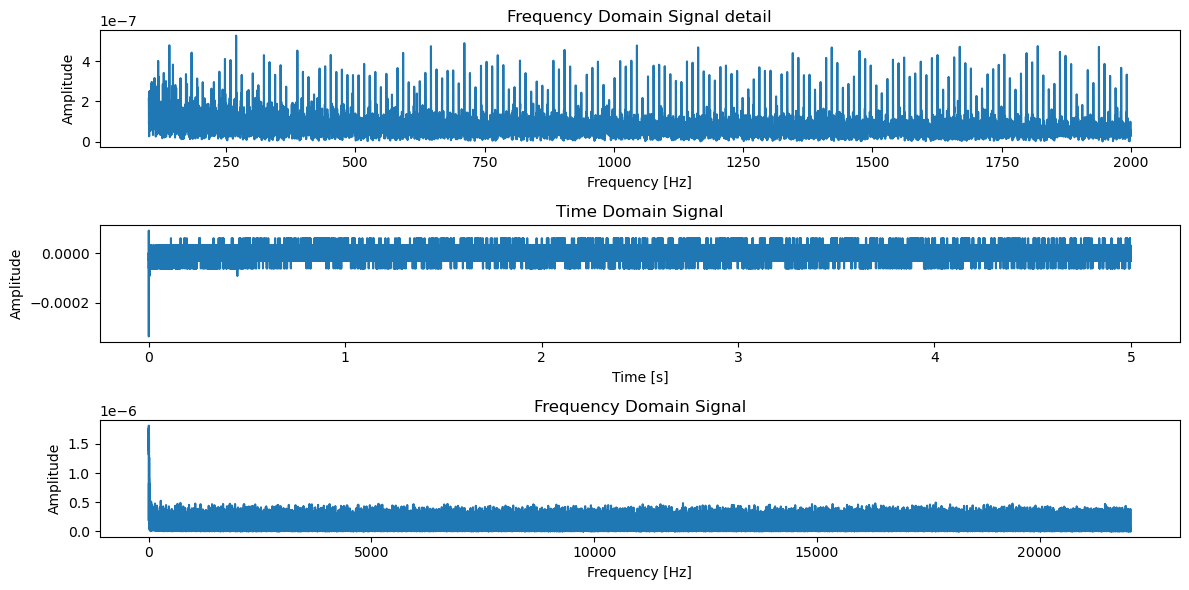

In [7]:


def analyze_microphone_signal(duration=2, sample_rate=44100):
    # Capture audio from microphone
    print("Recording...")
    audio_signal = sd.rec(int(duration * sample_rate), samplerate=sample_rate, channels=1, dtype='float64')
    sd.wait()  # Wait until recording is finished
    print("Recording finished.")
    
    sd.play(audio_signal)

    # Flatten the array
    audio_signal = audio_signal.flatten()

    # Time-domain plot
    time = np.linspace(0, duration, int(duration * sample_rate), endpoint=False)
    plt.figure(figsize=(12, 6))
    plt.subplot(3, 1, 2)
    plt.plot(time, audio_signal)
    plt.title("Time Domain Signal")
    plt.xlabel("Time [s]")
    plt.ylabel("Amplitude")
    
    # Frequency-domain plot
    N = len(audio_signal)
    T = 1.0 / sample_rate
    yf = fft(audio_signal)
    xf = np.fft.fftfreq(N, T)[:N//2]
    plt.subplot(3, 1, 3)
    plt.plot(xf, 2.0/N * np.abs(yf[:N//2]))
    plt.title("Frequency Domain Signal")
    plt.xlabel("Frequency [Hz]")
    plt.ylabel("Amplitude")
    
    # Frequency-domain plot
    N = len(audio_signal)
    T = 1.0 / sample_rate
    yf = fft(audio_signal)
    yf = 2.0/N * np.abs(yf[:N//2])
    xf = np.fft.fftfreq(N, T)[:N//2]
    df_f = pd.DataFrame({'f': xf,
                         'psd': yf})

    plt.subplot(3, 1, 1)
    sns.lineplot(data = df_f[ (df_f.f > 100) &(df_f.f < 2000)], x = 'f', y= 'psd')
    #plt.plot(xf, 2.0/N * np.abs(yf[:N//2]))
    plt.title("Frequency Domain Signal detail")
    plt.xlabel("Frequency [Hz]")
    plt.ylabel("Amplitude")

    # Show plots
    plt.tight_layout()
    plt.show()

    return(audio_signal, df_f)

    

# Example usage
original_signal, df_fft = analyze_microphone_signal(duration = 5)


### take samples

direkt über den mediaplayer default device 1   
Stereomix (Realtek(R) Audio), MME (2 in, 0 out)

In [19]:

#df_sample_data.to_csv("sample_data/keyboard_hoch_tief.csv")

def save_sample(df_signal, label, path_to_save = "sample_data/"):
    df_audio = pd.DataFrame({'signal' : df_signal})
    df_audio['label'] = label
    df_audio.to_csv(path_to_save + label + ".csv")
    return(df_audio)


,signal,label
0,0.000000,insturmental_element_crime
1,0.000000,insturmental_element_crime
2,-0.000031,insturmental_element_crime
3,0.000000,insturmental_element_crime
4,0.000000,insturmental_element_crime
...,...,...
132295,-0.000519,insturmental_element_crime
132296,-0.000397,insturmental_element_crime
132297,-0.000244,insturmental_element_crime
132298,-0.000244,insturmental_element_crime


In [8]:
duration_sel = 2
#sd.default.device = [2,4]
sd.default.device = [1,4]

In [38]:
#sample_1, df_fft_1 = analyze_microphone_signal(duration = duration_sel)


#save_sample(sample_1, label = "insturmental_element_crime")

,signal,label
0,-0.038940,insturmental_element_crime
1,-0.046814,insturmental_element_crime
2,-0.041443,insturmental_element_crime
3,-0.047363,insturmental_element_crime
4,-0.039276,insturmental_element_crime
...,...,...
88195,0.046051,insturmental_element_crime
88196,0.045563,insturmental_element_crime
88197,0.045349,insturmental_element_crime
88198,0.045227,insturmental_element_crime


In [40]:
#sample_2, df_fft_2 = analyze_microphone_signal(duration = duration_sel)
save_sample(sample_2, label = "gesang_element_crime")

,signal,label
0,0.051880,gesang_element_crime
1,0.045258,gesang_element_crime
2,0.051544,gesang_element_crime
3,-0.009583,gesang_element_crime
4,-0.050262,gesang_element_crime
...,...,...
88195,-0.019958,gesang_element_crime
88196,-0.020874,gesang_element_crime
88197,-0.020233,gesang_element_crime
88198,-0.017059,gesang_element_crime


In [42]:
sd.play(sample_2)

In [44]:
#sample_3, df_fft_3 = analyze_microphone_signal(duration = duration_sel)
save_sample(sample_3, label = "accordeon_element_crime")

,signal,label
0,-0.013428,accordeon_element_crime
1,-0.015289,accordeon_element_crime
2,-0.012939,accordeon_element_crime
3,-0.015289,accordeon_element_crime
4,-0.012665,accordeon_element_crime
...,...,...
88195,-0.040802,accordeon_element_crime
88196,-0.037659,accordeon_element_crime
88197,-0.035339,accordeon_element_crime
88198,-0.034637,accordeon_element_crime


### load sample data

In [70]:
df_sample = pd.read_csv("sample_data/keyboard_hoch_tief.csv")
df_sample_human = pd.read_csv("sample_data/human_hoch_tief.csv")

df_element_gesang = pd.read_csv("sample_data/gesang_element_crime.csv")
df_element_isntrumental = pd.read_csv("sample_data/insturmental_element_crime.csv")
df_element_accordeon = pd.read_csv("sample_data/accordeon_element_crime.csv")

### analyse sample data

In [26]:
def fft_from_signal(audio_signal,sample_rate = 44100, band_width = 50):
    N = len(audio_signal)
    T = 1.0 / sample_rate
    yf = fft(audio_signal)
    xf = np.fft.fftfreq(N, T)[:N//2]
    
    # Frequency-domain plot
    N = len(audio_signal)
    T = 1.0 / sample_rate
    yf = fft(audio_signal)
    positive_magnitudes = yf[:N//2] 
    yf = 2.0/N * np.abs(yf[:N//2])
    xf = np.fft.fftfreq(N, T)[:N//2]
    df_f = pd.DataFrame({'f': xf,
                         'psd': yf})



    # Calculate the number of bands
    num_bands = int(np.max(xf) // band_width) + 1

    # Sum the magnitudes within each band
    band_magnitudes = np.zeros(num_bands)
    for i in range(num_bands):
        band_start_freq = i * band_width
        band_end_freq = (i + 1) * band_width
        band_mask = (xf >= band_start_freq) & (xf < band_end_freq)
        band_magnitudes[i] = np.sum(abs(positive_magnitudes[band_mask]))

    # Identify the three most dominant bands
    dominant_bands_indices = np.argsort(band_magnitudes)[-3:][::-1]
    dominant_bands = [(i * band_width, (i + 1) * band_width) for i in dominant_bands_indices]

    plt.figure(figsize=(8, 3))
    sns.lineplot(data = df_f[ (df_f.f > 100) &(df_f.f < 2000)], x = 'f', y= 'psd')
    #plt.plot(xf, 2.0/N * np.abs(yf[:N//2]))
    for band in dominant_bands:
        plt.axvspan(band[0], band[1], color='red', alpha=0.3, label=f'{band[0]} Hz - {band[1]} Hz')
    plt.title("Frequency Domain Signal detail", y = 1.1)
    plt.suptitle(dominant_bands_indices, y=0.76)
    plt.xlabel("Frequency [Hz]")
    plt.ylabel("Amplitude")

    # Show plots
    plt.tight_layout()
    plt.show()

    

    return( dominant_bands_indices)

fft_from_signal(df_element_gesang['signal'].to_list())

NameError: name 'df_element_gesang' is not defined

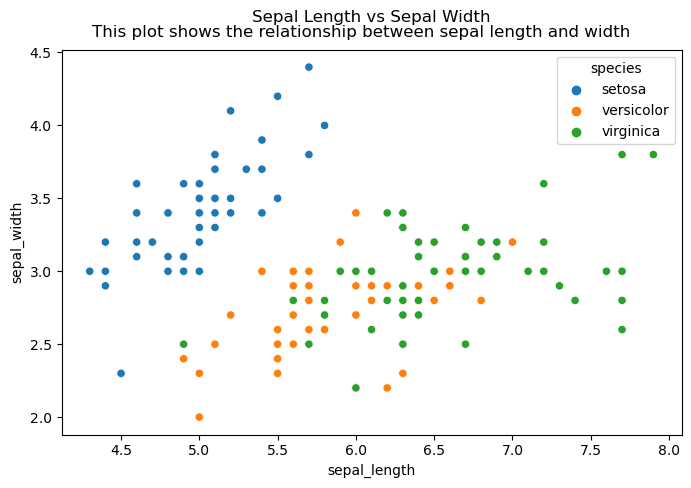

In [60]:

# Create some data
data = sns.load_dataset("iris")

# Set the figure size
plt.figure(figsize=(8, 5))

# Create a Seaborn plot
sns.scatterplot(x="sepal_length", y="sepal_width", hue="species", data=data)

# Add a main title
plt.title("Sepal Length vs Sepal Width",y = 1.05)

# Add a subtitle
plt.suptitle("This plot shows the relationship between sepal length and width", y=0.93)

# Show the plot
plt.show()

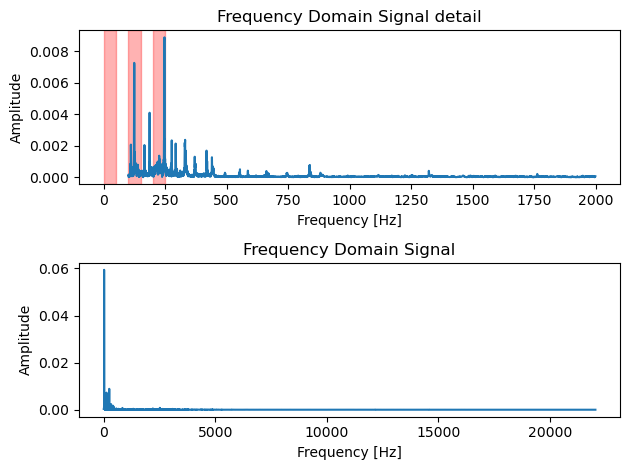

[(0, 50), (200, 250), (100, 150)]

In [51]:
fft_from_signal(df_element_isntrumental['signal'].to_list())

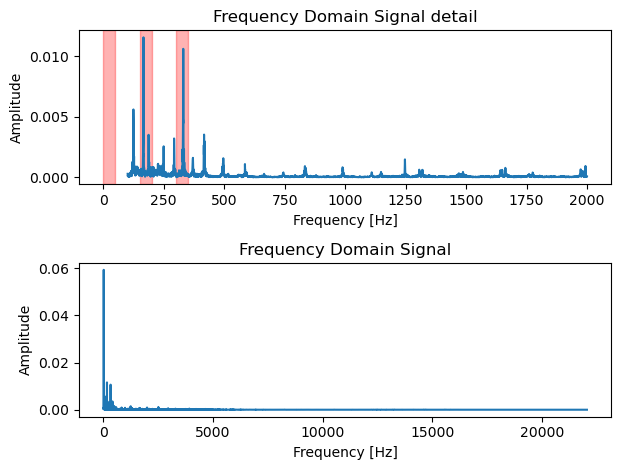

[(0, 50), (150, 200), (300, 350)]

In [52]:
fft_from_signal(df_element_accordeon['signal'].to_list())

## record in a loop

In [24]:
def record_signal(duration=2, sample_rate=44100):
    # Capture audio from microphone
    print("Recording...")
    audio_signal = sd.rec(int(duration * sample_rate), samplerate=sample_rate, channels=1, dtype='float64')
    sd.wait()  # Wait until recording is finished
    print("Recording finished.")
    
    #sd.play(audio_signal)

    # Flatten the array
    audio_signal = audio_signal.flatten()
    return(audio_signal)

In [29]:
sd.default.device = [1,4]
sd.default.device = [18,11] # ismael zuhause 2028-08-29
audio_test = record_signal()

Recording...
Recording finished.


In [31]:
sd.play(audio_test)

In [16]:
sd.query_devices()

>  0 Microsoft Sound Mapper - Input, MME (2 in, 0 out)
   1 Stereomix (Realtek(R) Audio), MME (2 in, 0 out)
   2 Microphone Array (Realtek(R) Au, MME (2 in, 0 out)
   3 Microsoft Sound Mapper - Output, MME (0 in, 2 out)
<  4 PA278QV (NVIDIA High Definition, MME (0 in, 2 out)
   5 Speaker (Realtek(R) Audio), MME (0 in, 2 out)
   6 Primärer Soundaufnahmetreiber, Windows DirectSound (2 in, 0 out)
   7 Stereomix (Realtek(R) Audio), Windows DirectSound (2 in, 0 out)
   8 Microphone Array (Realtek(R) Audio), Windows DirectSound (2 in, 0 out)
   9 Primärer Soundtreiber, Windows DirectSound (0 in, 2 out)
  10 PA278QV (NVIDIA High Definition Audio), Windows DirectSound (0 in, 2 out)
  11 Speaker (Realtek(R) Audio), Windows DirectSound (0 in, 2 out)
  12 Speaker (Realtek(R) Audio), Windows WASAPI (0 in, 2 out)
  13 PA278QV (NVIDIA High Definition Audio), Windows WASAPI (0 in, 2 out)
  14 Microphone Array (Realtek(R) Audio), Windows WASAPI (2 in, 0 out)
  15 Stereomix (Realtek(R) Audio), Windows 

Recording...
Recording finished.


c:\Users\rigle\.conda\envs\ml_9\lib\site-packages\matplotlib\text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


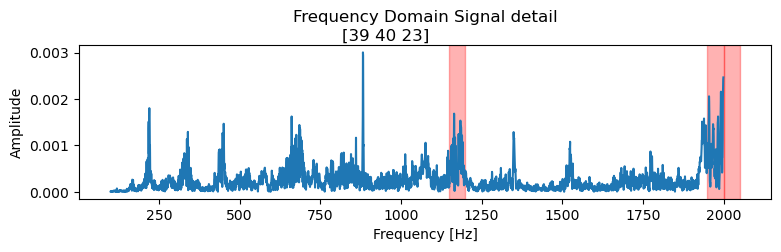

[39 40 23]
Recording...
Recording finished.


c:\Users\rigle\.conda\envs\ml_9\lib\site-packages\matplotlib\text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


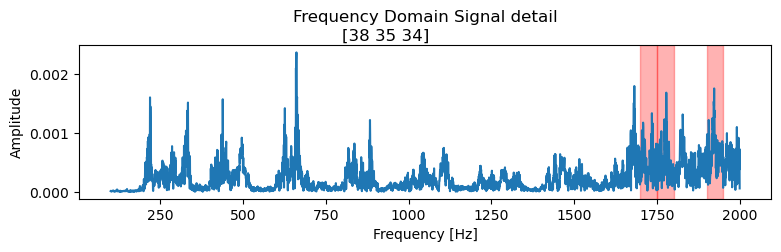

[38 35 34]
Recording...
Recording finished.


c:\Users\rigle\.conda\envs\ml_9\lib\site-packages\matplotlib\text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


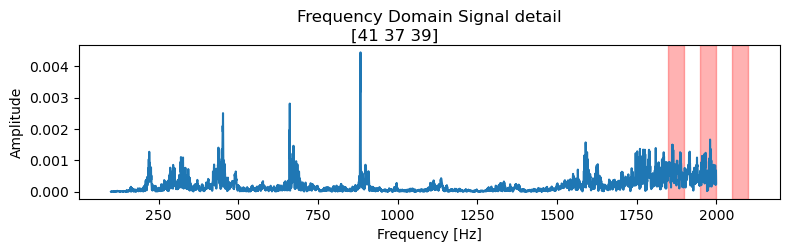

[41 37 39]
Recording...
Recording finished.


c:\Users\rigle\.conda\envs\ml_9\lib\site-packages\matplotlib\text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


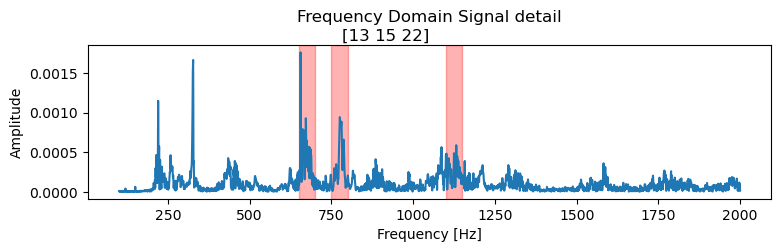

[13 15 22]
Recording...
Recording finished.


c:\Users\rigle\.conda\envs\ml_9\lib\site-packages\matplotlib\text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


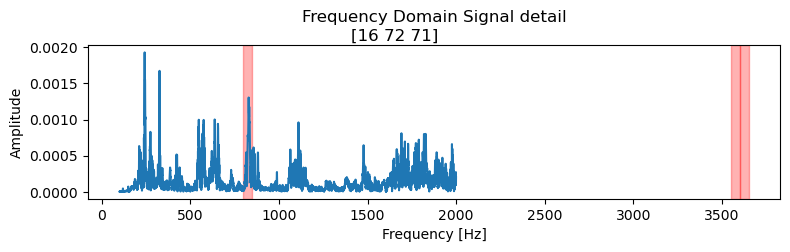

[16 72 71]
Recording...
Recording finished.


c:\Users\rigle\.conda\envs\ml_9\lib\site-packages\matplotlib\text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


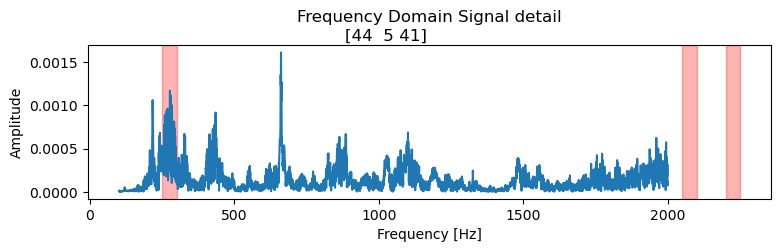

[44  5 41]
Recording...
Recording finished.


c:\Users\rigle\.conda\envs\ml_9\lib\site-packages\matplotlib\text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


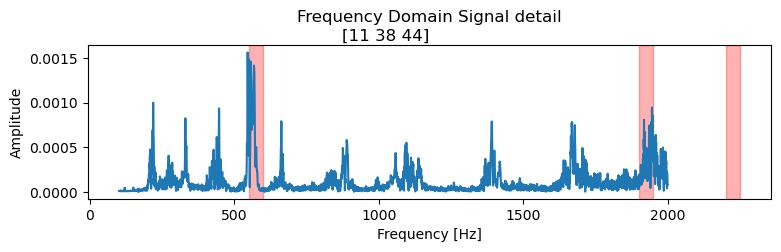

[11 38 44]
Recording...
Recording finished.


c:\Users\rigle\.conda\envs\ml_9\lib\site-packages\matplotlib\text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


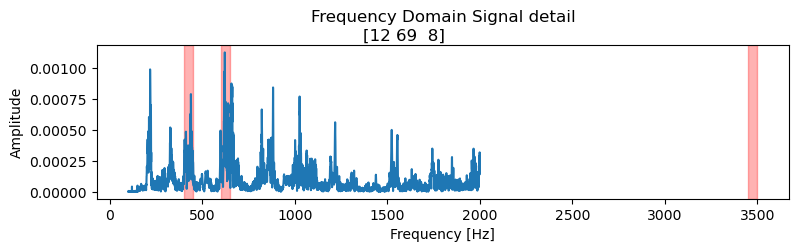

[12 69  8]
Recording...
Recording finished.


c:\Users\rigle\.conda\envs\ml_9\lib\site-packages\matplotlib\text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


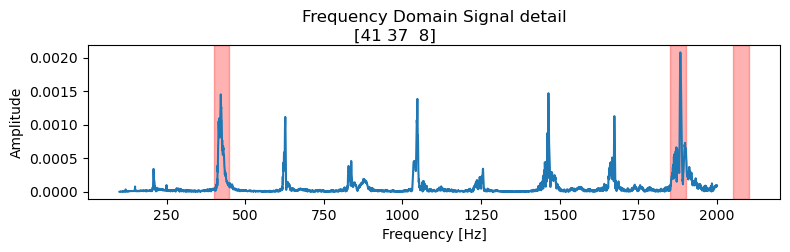

[41 37  8]
Recording...
Recording finished.


c:\Users\rigle\.conda\envs\ml_9\lib\site-packages\matplotlib\text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


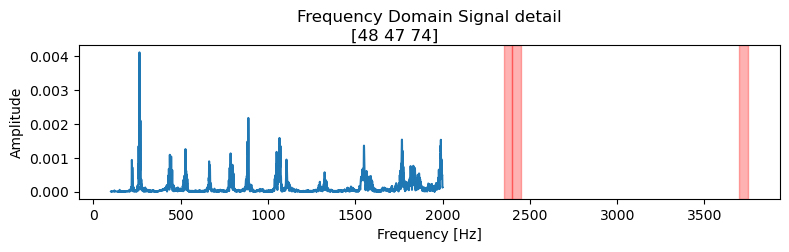

[48 47 74]
Recording...
Recording finished.


c:\Users\rigle\.conda\envs\ml_9\lib\site-packages\matplotlib\text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


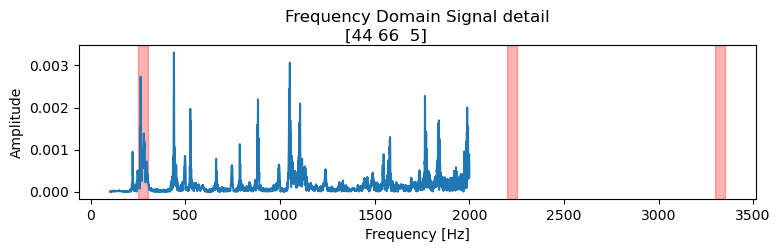

[44 66  5]
Recording...
Recording finished.


c:\Users\rigle\.conda\envs\ml_9\lib\site-packages\matplotlib\text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


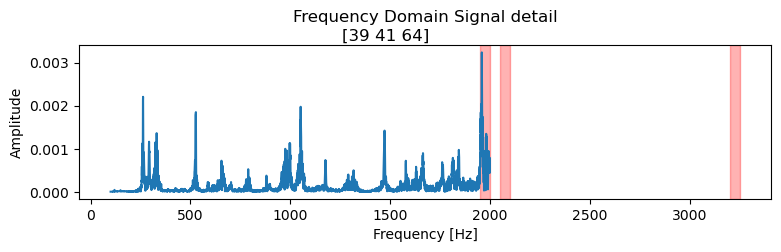

[39 41 64]
Recording...
Recording finished.


c:\Users\rigle\.conda\envs\ml_9\lib\site-packages\matplotlib\text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


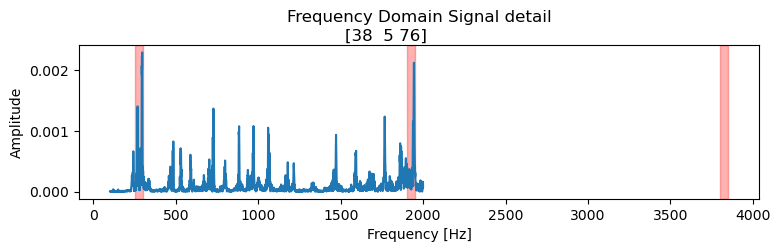

[38  5 76]
Recording...
Recording finished.


c:\Users\rigle\.conda\envs\ml_9\lib\site-packages\matplotlib\text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


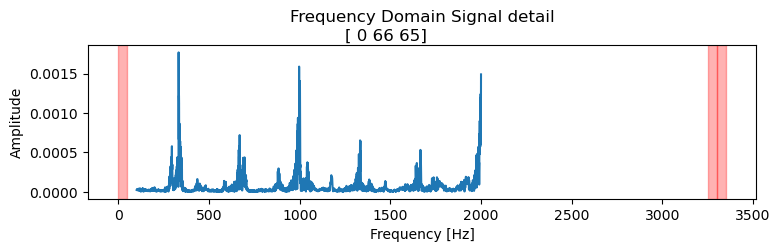

[ 0 66 65]
Recording...
Recording finished.


c:\Users\rigle\.conda\envs\ml_9\lib\site-packages\matplotlib\text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


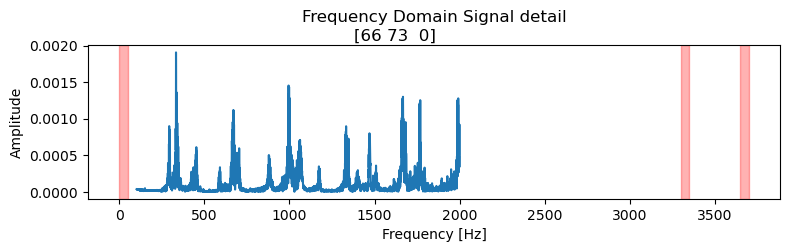

[66 73  0]
Recording...
Recording finished.


c:\Users\rigle\.conda\envs\ml_9\lib\site-packages\matplotlib\text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


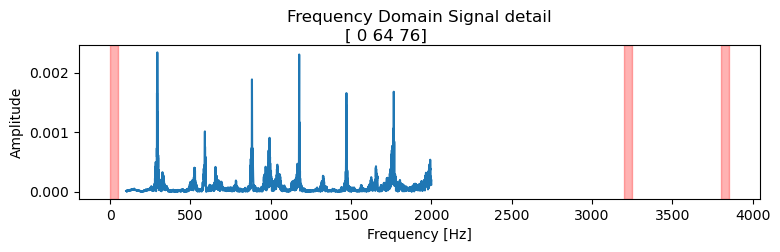

[ 0 64 76]
Recording...
Recording finished.


c:\Users\rigle\.conda\envs\ml_9\lib\site-packages\matplotlib\text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


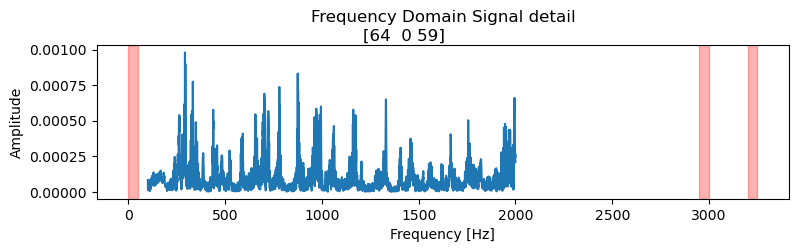

[64  0 59]
Recording...
Recording finished.


c:\Users\rigle\.conda\envs\ml_9\lib\site-packages\matplotlib\text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


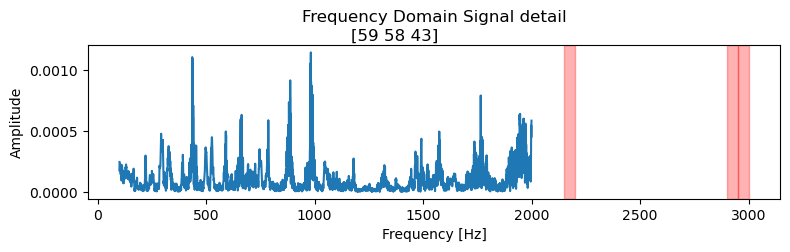

[59 58 43]
Recording...
Recording finished.


c:\Users\rigle\.conda\envs\ml_9\lib\site-packages\matplotlib\text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


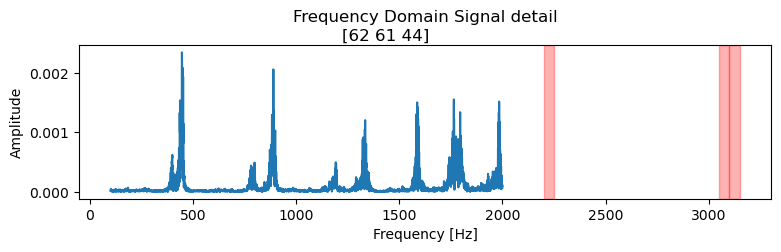

[62 61 44]
Recording...
Recording finished.


c:\Users\rigle\.conda\envs\ml_9\lib\site-packages\matplotlib\text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


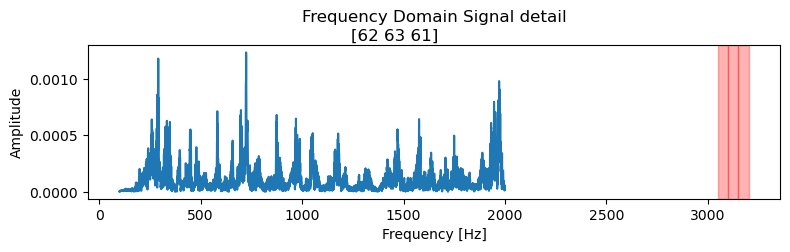

[62 63 61]
Recording...
Recording finished.


c:\Users\rigle\.conda\envs\ml_9\lib\site-packages\matplotlib\text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


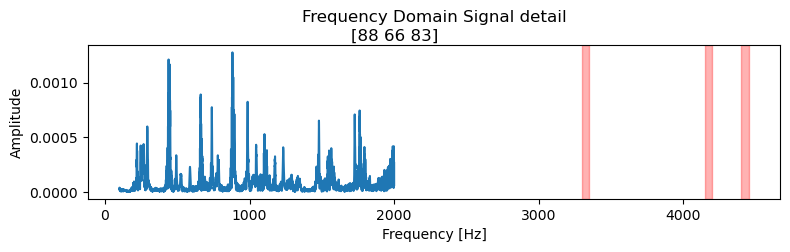

[88 66 83]
Recording...
Recording finished.


c:\Users\rigle\.conda\envs\ml_9\lib\site-packages\matplotlib\text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


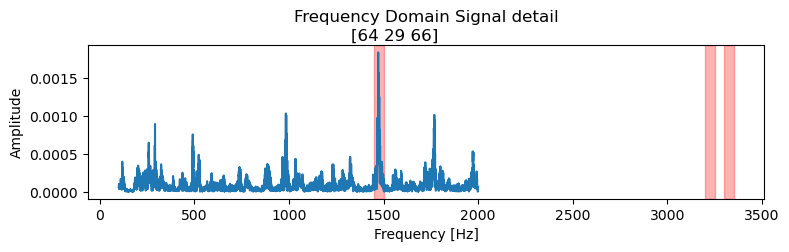

[64 29 66]
Recording...
Recording finished.


c:\Users\rigle\.conda\envs\ml_9\lib\site-packages\matplotlib\text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


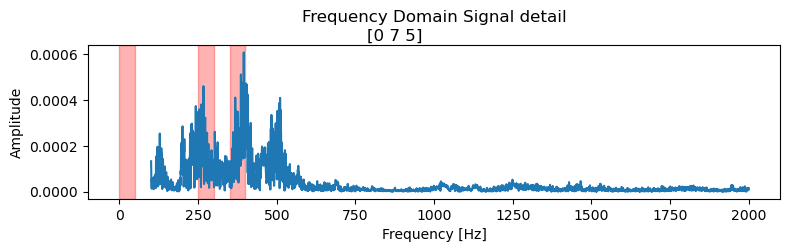

[0 7 5]
Recording...
Recording finished.


c:\Users\rigle\.conda\envs\ml_9\lib\site-packages\matplotlib\text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


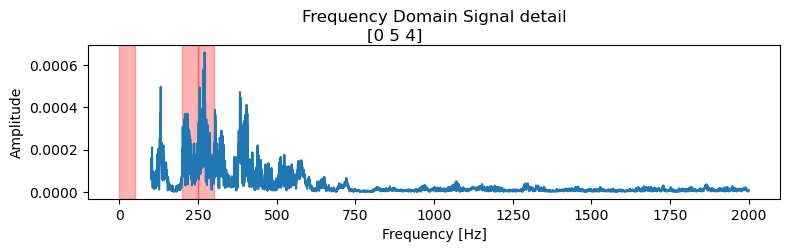

[0 5 4]
Recording...
Recording finished.


c:\Users\rigle\.conda\envs\ml_9\lib\site-packages\matplotlib\text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


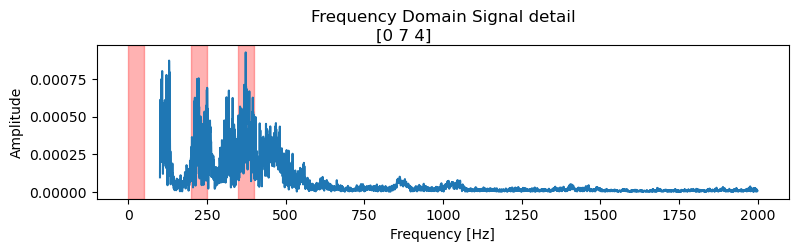

[0 7 4]
Recording...


KeyboardInterrupt: 

In [30]:
import threading
import time
import sys

sd.default.device = [0,4]
sd.default.device = [18,11] # ismael zuhause 2028-08-29

def call_function_periodically(duration_record_sec = 2, duration_waiting = 1, duration_max= 100):
    start_time = time.time()
    stop_time = start_time + duration_max  # Stop after duration_max seconds
    
    pd_dominant_bands = pd.DataFrame({'dominant_bands: []',
                                             'sanmple_time: []'})

    
    while time.time() < stop_time:
        # Call the function

        sample_time = time.time() - start_time
        audio_signal = record_signal(duration = duration_record_sec)
        dominant_bands = fft_from_signal(audio_signal)
        print(dominant_bands)

        pd_dominant_bands_sample = pd.DataFrame({'dominant_bands' : dominant_bands.tolist()})
        pd_dominant_bands_sample['sanmple_time'] =sample_time 

        pd_dominant_bands = pd.concat([pd_dominant_bands, pd_dominant_bands_sample])
        
        # Wait for 5 seconds
        time.sleep(duration_waiting)
        
    return(pd_dominant_bands)    
        # Check if 'q' has been pressedq
# Create and start the input thread
#input_thread = InputThread()
#input_thread.start()

# Call the function periodically
dominant_bands_Result = call_function_periodically()

# Join the input thread
#input_thread.join()

print("Program has ended.")


<AxesSubplot: xlabel='sanmple_time', ylabel='dominant_bands'>

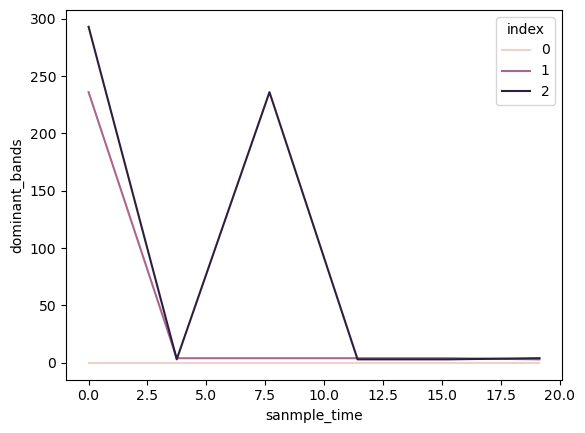

In [108]:
#dominant_bands_Result[dominant_bands_Result.O]
plot_data = dominant_bands_Result[(dominant_bands_Result.sanmple_time >=0)].reset_index()
plot_data
sns.lineplot(data= plot_data, x = 'sanmple_time', y = 'dominant_bands', hue = 'index')